# FINAL PROJECT 

Bigyan Rimal 

PSS-6302-001
Plant Growth Modelling

Submitted to : Dr. Wenxuan Guo


Introduction 

Crop Modelling is a process of simulating the crop growth and development based on the empirical data for weather conditions, soil chemistry and management practices in the crop field. This project is mainly concentrating on the simulating the growth and development of the corn RM 120 hybrids grown in Bushland Texas. We using the concept of parameterization to model the growth and development of corn as a function of weather condition in the Bushland, Texas region. 

The weather data obtained for the simulation contained information for the parameters like day of the year, time of the day, air temperature, relative humidity, solar radiation, wind speed, barometric potential and rainfall. A screen shot of how the data looked like is shown in Figure 1. The modelling is done based on the daily growing degree unit concept, which considers temperature as one of the major parameters to model other variables that determine the growth and development of the Corn RM 120 hybrids. In the US, the corn hybrid maturity is mainly expressed in either RM or GDD system. In RM system, the maturity is mainly based on days. Though there is no any specific system to measure RM, it is considered the total growing degree units required by plants from emergence to physiological maturity. 

Ojective

The major objective of this project is to develop a growth model for RM 120 Corn hybrid and simulate the daily growth and development based on the information provided in the data as shown in Figure 1. The variables that are being predicted range from emergence time to final yield. We are also trying to perform the within season calibration of these variable to figure out the validility of the model we used. The major variables that are being predicted are:

1. Leaf area index (LAI)
2. Biomass 
3. Phenology including emergence, flowering and physiological maturity
4. Final Yield 


![Structure](datalook.png)
Figure 1: Bushland TX weather data structure 

In [1]:
from datetime import datetime
from matplotlib import pyplot as plt
from IPython.display import Markdown, display
import numpy.polynomial.polynomial as poly
import ipywidgets as widgets
from IPython.display import display, HTML
import pandas as pd
import math
import numpy as np
from scipy import stats
from IPython.display import Image

Most of the necessary libraries are loaded (above) and the notebook structure modification is done (below) before starting the simulation so that the simulation runs fine later

In [2]:
HTML("""
<style>

div.cell { /* Tunes the space between cells */
margin-top:1em;
margin-bottom:1em;
}

div.text_cell_render h1 { /* Main titles bigger, centered */
font-size: 2.2em;
line-height:1.4em;
text-align:center;
}

div.text_cell_render h2 { /*  Parts names nearer from text */
margin-bottom: -0.4em;
}


div.text_cell_render { /* Customize text cells */
font-family: 'Times New Roman';
font-size:1.5em;
line-height:1.4em;
padding-left:3em;
padding-right:3em;
}
</style>
""")

In [3]:
 df = pd.read_csv("https://www.dropbox.com/s/3wkj6mt1h600l8m/Bushland_2016.csv?dl=1") #bushland data 

The weather data that was provided is imported as .csv file using the dropbox link provoided above. 

In [4]:
df.head(1) #looking at data structure 

,Year,DOY,Time,AirTemp,RelHumid,SolRad,WS_2m,BP,Rainfall_Tot
0,2016,1,15,-3.137272,99.82642,0.005017,2.011444,90.29302,0.0


In [5]:
df["date"] = [str(df.loc[i,("Year")])+"-"+str(df.loc[i,("DOY")]) for i in range(0,len(df),1)]

In [6]:
df["date"] = pd.to_datetime(df["date"], format = "%Y-%j")

Addition of new column called date (corresponding to each day of the year) into the dataframe

In [7]:
df.head(5)  
#added a date column so that I could filter the data for the growing season of Corn RM 120 Variety 

,Year,DOY,Time,AirTemp,RelHumid,SolRad,WS_2m,BP,Rainfall_Tot,date
0,2016,1,15,-3.137272,99.82642,0.005017,2.011444,90.29302,0.0,2016-01-01
1,2016,1,30,-3.171428,99.81180,0.000912,2.108333,90.29030,0.0,2016-01-01
2,2016,1,45,-3.204267,99.63895,0.003192,1.661222,90.28892,0.0,2016-01-01
3,2016,1,100,-3.230289,99.58411,0.002736,1.848778,90.29369,0.0,2016-01-01
4,2016,1,115,-3.245439,99.44096,0.006841,1.843444,90.29673,0.0,2016-01-01


In [8]:
df.tail(5)

,Year,DOY,Time,AirTemp,RelHumid,SolRad,WS_2m,BP,Rainfall_Tot,date
35131,2016,366,2300,0.022211,58.50889,0.000912,1.682555,88.46530,0.0,2016-12-31
35132,2016,366,2315,0.076889,58.76506,0.000000,1.723444,88.45306,0.0,2016-12-31
35133,2016,366,2330,-0.782683,59.56689,0.000912,1.010556,88.45546,0.0,2016-12-31
35134,2016,366,2345,-2.478978,64.25793,0.001368,1.593667,88.45177,0.0,2016-12-31
35135,2016,366,2400,-2.261344,68.27528,0.000000,2.275444,88.44198,0.0,2016-12-31


In [9]:
df["AirTemp"].min(), df["AirTemp"].max()

(-21.51886, 42.520444439999999)

In [10]:
df = df[(df['DOY'] >= 143) & (df['DOY'] <= 210)] 

This date range is selected based on the provided information for the simulation. The guideline suggested physiological maturity is obtained at GDU 2850 Fahrenhite. Based on the provided guideline I have converted all the temperature values (especially the daily GDU values) into the fahrenhiet unit and calculated the downstream parameters in both celcius and fahrenheit. The relationship is also shown in Figure 2 (Neilsen, 2002).  

# Example of Relative Maturity and GDU Relations 
![RM120_GDU](pic2.png)
Figure 2: Relationship between relative maturity and growing degree units

In [11]:
df.head(5)

,Year,DOY,Time,AirTemp,RelHumid,SolRad,WS_2m,BP,Rainfall_Tot,date
13632,2016,143,15,20.396922,75.31538,0.000457,5.556334,88.73635,0.0,2016-05-22
13633,2016,143,30,20.103461,77.90866,0.000913,5.680778,88.75574,0.0,2016-05-22
13634,2016,143,45,19.745494,81.03214,0.000000,5.133222,88.77025,0.0,2016-05-22
13635,2016,143,100,19.327022,83.40429,0.000457,5.123444,88.76434,0.0,2016-05-22
13636,2016,143,115,18.987128,85.08110,0.000000,4.886111,88.74968,0.0,2016-05-22


The minimum and maximum values within each column are checked so that data could be filtered to set a reasonable range to 
perform further calculations

In [12]:
df["AirTemp"] = df["AirTemp"][(df["AirTemp"] < 45) & (df["AirTemp"] > -30)]
df["AirTemp"].min(), df["AirTemp"].max()

(7.4481277779999999, 42.520444439999999)

In [13]:
df["SolRad"].min(), df["SolRad"].max()

(0.0, 1109.7660000000001)

In [14]:
df["WS_2m"].min(), df["WS_2m"].max()

(0.44700000000000001, 12.888780000000001)

In [15]:
df["RelHumid"].min(), df["RelHumid"].max()

(3.449951, 100.0)

In [16]:
df["Rainfall_Tot"].min(), df["Rainfall_Tot"].max()

(0.0, 9.9060000000000006)

To check if there are any empty or not available values in the dataframe, within the column, following code for True/False logical expression was accessed. 

In [17]:
df["AirTemp"].isnull().values.any()

False

In [18]:
df["WS_2m"].isnull().values.any()

False

In [19]:
df["SolRad"].isnull().values.any()

False

In [20]:
df["RelHumid"].isnull().values.any()

False

In [21]:
df["Rainfall_Tot"].isnull().values.any()

True

In [22]:
df["Rainfall_Tot"] = df["Rainfall_Tot"].fillna(0)

In [23]:
df["BP"].isnull().values.any()

False

In [24]:
df["Rainfall_Tot"].isnull().values.any()

False

In [25]:
df.head(5)

,Year,DOY,Time,AirTemp,RelHumid,SolRad,WS_2m,BP,Rainfall_Tot,date
13632,2016,143,15,20.396922,75.31538,0.000457,5.556334,88.73635,0.0,2016-05-22
13633,2016,143,30,20.103461,77.90866,0.000913,5.680778,88.75574,0.0,2016-05-22
13634,2016,143,45,19.745494,81.03214,0.000000,5.133222,88.77025,0.0,2016-05-22
13635,2016,143,100,19.327022,83.40429,0.000457,5.123444,88.76434,0.0,2016-05-22
13636,2016,143,115,18.987128,85.08110,0.000000,4.886111,88.74968,0.0,2016-05-22


As there was 96 data point for each day (every 15 minutes), I converted it into the daily data point by taking mean based on date column. Making a separate date column came into handy at this time. 

In [26]:
df1 = df.groupby(['date']).mean ()
df1.head(5)

,Year,DOY,Time,AirTemp,RelHumid,SolRad,WS_2m,BP,Rainfall_Tot
date,,,,,,,,,
2016-05-22,2016.0,143.0,1197.5,22.758258,70.400146,270.581425,6.301453,88.492337,0.0
2016-05-23,2016.0,144.0,1197.5,23.595634,56.143024,322.371178,4.679333,88.253774,0.0
2016-05-24,2016.0,145.0,1197.5,23.739478,48.437541,342.411750,5.080129,88.349629,0.0
2016-05-25,2016.0,146.0,1197.5,21.464484,28.307362,340.758613,3.400435,88.568253,0.0
2016-05-26,2016.0,147.0,1197.5,21.419798,30.324647,335.851717,4.445796,88.169097,0.0


A separate column for minimum and maximum temperature is created to calculate the GDU. 

In [27]:
df1["mint.C"] =df.groupby('DOY').min()["AirTemp"].values

In [28]:
df1["maxt.C"] =df.groupby('DOY').max()["AirTemp"].values

In [29]:
df1.head(5)

,Year,DOY,Time,AirTemp,RelHumid,SolRad,WS_2m,BP,Rainfall_Tot,mint.C,maxt.C
date,,,,,,,,,,,
2016-05-22,2016.0,143.0,1197.5,22.758258,70.400146,270.581425,6.301453,88.492337,0.0,15.988106,30.226667
2016-05-23,2016.0,144.0,1197.5,23.595634,56.143024,322.371178,4.679333,88.253774,0.0,15.751111,32.492039
2016-05-24,2016.0,145.0,1197.5,23.739478,48.437541,342.411750,5.080129,88.349629,0.0,14.840189,33.606967
2016-05-25,2016.0,146.0,1197.5,21.464484,28.307362,340.758613,3.400435,88.568253,0.0,8.229144,32.298183
2016-05-26,2016.0,147.0,1197.5,21.419798,30.324647,335.851717,4.445796,88.169097,0.0,11.318367,31.212822


In [30]:
df1.tail(5)

,Year,DOY,Time,AirTemp,RelHumid,SolRad,WS_2m,BP,Rainfall_Tot,mint.C,maxt.C
date,,,,,,,,,,,
2016-07-24,2016.0,206.0,1197.5,29.019363,38.812859,279.485800,3.556333,88.941145,0.000000,20.611867,38.127556
2016-07-25,2016.0,207.0,1197.5,25.929934,55.465048,270.543982,3.348768,89.153110,0.000000,19.743778,35.502489
2016-07-26,2016.0,208.0,1197.5,27.663564,46.522653,276.480919,3.230139,89.048124,0.000000,19.474939,37.035639
2016-07-27,2016.0,209.0,1197.5,24.542325,64.188018,194.868946,3.259667,89.059092,0.156104,19.423906,34.364261
2016-07-28,2016.0,210.0,1197.5,25.826994,47.674128,315.866720,2.855648,89.070142,0.000000,15.825867,34.644633


Solar radiation to solar irradiance conversion factor

1 MJ m-2 d-1 = 1000000 J m-2 d-1 / 86400 s d-1

             = 11.574 J m-2 s-1
             
             = 11.574 W m-2df1
        
The Solar Radiation from the weather data is given in watt per square metwer. Total sol rad in W per sq m is converted to Total Daily Sol Irradiance in MJ per sq. m below based on the conversion factor given above. 

In [31]:
df1["Sol-Irr"] =df1["SolRad"]/11.574 #calculated based on the conversion factor given above

In [32]:
df1.head(1)

,Year,DOY,Time,AirTemp,RelHumid,SolRad,WS_2m,BP,Rainfall_Tot,mint.C,maxt.C,Sol-Irr
date,,,,,,,,,,,,
2016-05-22,2016.0,143.0,1197.5,22.758258,70.400146,270.581425,6.301453,88.492337,0.0,15.988106,30.226667,23.378385


In [33]:
##(base Temperature for Corn is 50 degree Fahrenheit or 10 degree Celcius)
df1["dGDUdegC"] = df1["mint.C"] + df1["maxt.C"]/2 - 10
#daily DGU is the average temp of daily high and low temp, AirTemp is also the same 

In [34]:
df1["dGDUdegF"] = df1["dGDUdegC"] * 1.8

In [35]:
df1["dGDUdegF"] = df1["dGDUdegF"].clip(lower=0)
df1["dGDUdegC"] = df1["dGDUdegC"].clip(lower=0)

In [36]:
df1['accu_GDU-F'] = np.cumsum(df1['dGDUdegF'])
df1['accu_GDU-C'] = np.cumsum(df1['dGDUdegC'])

In [37]:
df1.head(5)

,Year,DOY,Time,AirTemp,RelHumid,SolRad,WS_2m,BP,Rainfall_Tot,mint.C,maxt.C,Sol-Irr,dGDUdegC,dGDUdegF,accu_GDU-F,accu_GDU-C
date,,,,,,,,,,,,,,,,
2016-05-22,2016.0,143.0,1197.5,22.758258,70.400146,270.581425,6.301453,88.492337,0.0,15.988106,30.226667,23.378385,21.101439,37.982590,37.982590,21.101439
2016-05-23,2016.0,144.0,1197.5,23.595634,56.143024,322.371178,4.679333,88.253774,0.0,15.751111,32.492039,27.853048,21.997131,39.594835,77.577425,43.098569
2016-05-24,2016.0,145.0,1197.5,23.739478,48.437541,342.411750,5.080129,88.349629,0.0,14.840189,33.606967,29.584565,21.643672,38.958610,116.536035,64.742242
2016-05-25,2016.0,146.0,1197.5,21.464484,28.307362,340.758613,3.400435,88.568253,0.0,8.229144,32.298183,29.441733,14.378236,25.880825,142.416860,79.120478
2016-05-26,2016.0,147.0,1197.5,21.419798,30.324647,335.851717,4.445796,88.169097,0.0,11.318367,31.212822,29.017774,16.924778,30.464600,172.881460,96.045256


In [38]:
df1.tail(6)

,Year,DOY,Time,AirTemp,RelHumid,SolRad,WS_2m,BP,Rainfall_Tot,mint.C,maxt.C,Sol-Irr,dGDUdegC,dGDUdegF,accu_GDU-F,accu_GDU-C
date,,,,,,,,,,,,,,,,
2016-07-23,2016.0,205.0,1197.5,28.390855,36.249558,320.458344,4.523528,88.865955,0.000000,16.446994,37.617044,27.687778,25.255517,45.459930,2737.395195,1520.775108
2016-07-24,2016.0,206.0,1197.5,29.019363,38.812859,279.485800,3.556333,88.941145,0.000000,20.611867,38.127556,24.147728,29.675644,53.416160,2790.811355,1550.450753
2016-07-25,2016.0,207.0,1197.5,25.929934,55.465048,270.543982,3.348768,89.153110,0.000000,19.743778,35.502489,23.375150,27.495022,49.491040,2840.302395,1577.945775
2016-07-26,2016.0,208.0,1197.5,27.663564,46.522653,276.480919,3.230139,89.048124,0.000000,19.474939,37.035639,23.888104,27.992758,50.386965,2890.689360,1605.938533
2016-07-27,2016.0,209.0,1197.5,24.542325,64.188018,194.868946,3.259667,89.059092,0.156104,19.423906,34.364261,16.836785,26.606036,47.890865,2938.580225,1632.544569
2016-07-28,2016.0,210.0,1197.5,25.826994,47.674128,315.866720,2.855648,89.070142,0.000000,15.825867,34.644633,27.291059,23.148183,41.666730,2980.246955,1655.692753


# PHENOLOGY
GDU requirement for (RM 120) corn variety phenological changes were provided except for Emergence. Following are the given GDU requirements

1. Flowering : 1250 F

2. Physiological Maturity : 2850 F 

More information on GDU requirement for different phenological changes in Corn was obtained from Ritchie S. W. et. al. 1997. Ritchie et. al describes how the corn growth stages change and how growing degree units requirement changes over time in corn growth and development. 




In [39]:
accgduF = list (df1["accu_GDU-F"]) 
accgduC = list (df1["accu_GDU-C"])

In [67]:
emergeGDU = 130 #obtained from Ritchie et. al. 1997
for ind, item in enumerate(accgduF):
    if item >= emergeGDU:
        print(" Corn emerges on day %s" % (ind+1), "which is May 25")
        break
        
emergeGDU = 130/1.8 #conversion of deg C GDU into deg F GDU units 
for ind, item in enumerate(accgduC):
    if item >= emergeGDU:
        print(" Corn emerges on day %s" % (ind+1), "which is May 25")
        break

 Corn emerges on day 4 which is May 25
 Corn emerges on day 4 which is May 25


In [68]:
VT = 1250 #tasseling or flowering start
for ind, item in enumerate(accgduF):
    if item >= VT:
        print(" Corn flowers on day %s" % (ind+1), "which is June 24")
        break
VT = 1250/1.8 #tasseling or flowering start #conversion of deg C GDU into deg F GDU units 
for ind, item in enumerate(accgduC):
    if item >= VT:
        print(" Corn flowers on day %s" % (ind+1), "which is June 24")
        break

 Corn flowers on day 34 which is June 24
 Corn flowers on day 34 which is June 24


In [69]:
PM = 2850 #physiological maturity
for ind, item in enumerate(accgduF):
    if item >= PM:
        print(" Corn reaches Physiological Maturity on day %s" % (ind+1), "which is July 26")
        break
PM = 2850/1.8 #physiological maturity #conversion of deg C GDU into deg F GDU units 
for ind, item in enumerate(accgduC):
    if item >= PM:
        print(" Corn reaches Physiological Maturity on day %s" % (ind+1), "which is July 26")
        break

 Corn reaches Physiological Maturity on day 66 which is July 26
 Corn reaches Physiological Maturity on day 66 which is July 26


# LEAF AREA INDEX
LAI is calculated based on Phyllochron concept as described by Soltani et. al. 2006 referenced from the book by Sinclair et. al. A representative schematic model for LAI calculation proposed by Soltani et. al. is shown in Figure 3.

![LAI Model](phyl.png)
Figure 3: Schematic model for calculating LAI based on Phyllochron concept

Based on Phyllochron concept, from emergence to termination of leaf growth in main stem, leaf number (INODE) can be calculated from daily growing degree unit 

INODE = dGDU/Phyl

In [70]:
Phyl = 50 #Phyllochron for Corn Soltani et. al. 2006
df1["INODE-F"] = df1["dGDUdegF"]/Phyl
df1["INODE-C"] = df1["dGDUdegC"]/Phyl

In [72]:
df1.head(1)

,Year,DOY,Time,AirTemp,RelHumid,SolRad,WS_2m,BP,Rainfall_Tot,mint.C,...,PLAI-C,PLAI-F,GLAI-F,GLAI-C,APAR-C,APAR-F,ddmp-C,ddmp-F,tdmp-C,tdmp-F
date,,,,,,,,,,,,,,,,,,,,,
2016-05-22,2016.0,143.0,1197.5,22.758258,70.400146,270.581425,6.301453,88.492337,0.0,15.988106,...,0.071994,0.432389,0.000406,0.000068,0.000387,0.002325,0.001487,0.008929,0.001487,0.008929


Increasing total main-stem node(MSNN) is calculated based on the daily increase in node number (INODE). This is obtained by adding daily value of INODE to the previous day total main-stem node number.

MSNN(i)= MSNN(i-1) + INODE

In [73]:
df1['MSNN-F'] = np.cumsum(df1['INODE-F'])
df1['MSNN-C'] = np.cumsum(df1['INODE-C'])

In [46]:
df1.head(5)

,Year,DOY,Time,AirTemp,RelHumid,SolRad,WS_2m,BP,Rainfall_Tot,mint.C,maxt.C,Sol-Irr,dGDUdegC,dGDUdegF,accu_GDU-F,accu_GDU-C,INODE-F,INODE-C,MSNN-F,MSNN-C
date,,,,,,,,,,,,,,,,,,,,
2016-05-22,2016.0,143.0,1197.5,22.758258,70.400146,270.581425,6.301453,88.492337,0.0,15.988106,30.226667,23.378385,21.101439,37.982590,37.982590,21.101439,0.759652,0.422029,0.759652,0.422029
2016-05-23,2016.0,144.0,1197.5,23.595634,56.143024,322.371178,4.679333,88.253774,0.0,15.751111,32.492039,27.853048,21.997131,39.594835,77.577425,43.098569,0.791897,0.439943,1.551549,0.861971
2016-05-24,2016.0,145.0,1197.5,23.739478,48.437541,342.411750,5.080129,88.349629,0.0,14.840189,33.606967,29.584565,21.643672,38.958610,116.536035,64.742242,0.779172,0.432873,2.330721,1.294845
2016-05-25,2016.0,146.0,1197.5,21.464484,28.307362,340.758613,3.400435,88.568253,0.0,8.229144,32.298183,29.441733,14.378236,25.880825,142.416860,79.120478,0.517616,0.287565,2.848337,1.582410
2016-05-26,2016.0,147.0,1197.5,21.419798,30.324647,335.851717,4.445796,88.169097,0.0,11.318367,31.212822,29.017774,16.924778,30.464600,172.881460,96.045256,0.609292,0.338496,3.457629,1.920905


There has been an allometric relationship seen, for many crop species, between the main stem leaf number and plant leaf area which is expressed as 

PLA = PLACON * MSNN^PLAPOW 

PLA = Plant leaf area

PLACON = Plant constant generally assumed as 1 cm^2

PLAPOW = Plant specific constant (3.050 for Corn)

In [74]:
PLAPOW = 3.050 #plant costant Soltani et. al. 2006
df1["PLA-F"] = df1["MSNN-F"].pow(3.050) #plant leaf area 
df1["PLA-C"] = df1["MSNN-C"].pow(3.050) 

In [48]:
df1.head(5)

,Year,DOY,Time,AirTemp,RelHumid,SolRad,WS_2m,BP,Rainfall_Tot,mint.C,...,dGDUdegC,dGDUdegF,accu_GDU-F,accu_GDU-C,INODE-F,INODE-C,MSNN-F,MSNN-C,PLA-F,PLA-C
date,,,,,,,,,,,,,,,,,,,,,
2016-05-22,2016.0,143.0,1197.5,22.758258,70.400146,270.581425,6.301453,88.492337,0.0,15.988106,...,21.101439,37.982590,37.982590,21.101439,0.759652,0.422029,0.759652,0.422029,0.432389,0.071994
2016-05-23,2016.0,144.0,1197.5,23.595634,56.143024,322.371178,4.679333,88.253774,0.0,15.751111,...,21.997131,39.594835,77.577425,43.098569,0.791897,0.439943,1.551549,0.861971,3.817986,0.635701
2016-05-24,2016.0,145.0,1197.5,23.739478,48.437541,342.411750,5.080129,88.349629,0.0,14.840189,...,21.643672,38.958610,116.536035,64.742242,0.779172,0.432873,2.330721,1.294845,13.208248,2.199197
2016-05-25,2016.0,146.0,1197.5,21.464484,28.307362,340.758613,3.400435,88.568253,0.0,8.229144,...,14.378236,25.880825,142.416860,79.120478,0.517616,0.287565,2.848337,1.582410,24.350270,4.054363
2016-05-26,2016.0,147.0,1197.5,21.419798,30.324647,335.851717,4.445796,88.169097,0.0,11.318367,...,16.924778,30.464600,172.881460,96.045256,0.609292,0.338496,3.457629,1.920905,43.981919,7.323067


# PLANT DENSITY CALCULATION

Plant density was provided in number of plants per acre which is converted to plants per square meter using the conversion factor below. 

1 acre = 4046.86 sq.m

Experimental plot has 38000 plants/acre

In [75]:
PDEN = 38000/4046.86 #plants/sq. meter
print("Plant density is", PDEN, "plants per sq. meter")

Plant density is 9.389996194580489 plants per sq. meter


Daily growth in Leaf Area Index (GLAI) is calculated by dividing Daily Plant leaf area increase [PLA(i) - PLA(i-1)] by plant density. The total GLAI is divided by 10000 to convert units from centimeter square to meter square. 

GLAI = [PLA(i) - PLA(i-1)] * Plant density(PDEN)/10,000

In [50]:
df1['PLAI-C'] = df1['PLA-C'].sub(df1['PLA-C'].shift()) #daily increase in plant leaf area 
df1['PLAI-F'] = df1['PLA-F'].sub(df1['PLA-F'].shift())
df1['PLAI-C'].iloc[0] = df1['PLA-C'].iloc[0]
df1['PLAI-F'].iloc[0] = df1['PLA-F'].iloc[0]
    

In [76]:
df1['GLAI-F'] = (df1["PLAI-F"] * PDEN)/10000  #daily growth in leaf area index 
df1['GLAI-C'] = (df1["PLAI-C"] * PDEN)/10000

In [77]:
df1.head()

,Year,DOY,Time,AirTemp,RelHumid,SolRad,WS_2m,BP,Rainfall_Tot,mint.C,...,PLAI-C,PLAI-F,GLAI-F,GLAI-C,APAR-C,APAR-F,ddmp-C,ddmp-F,tdmp-C,tdmp-F
date,,,,,,,,,,,,,,,,,,,,,
2016-05-22,2016.0,143.0,1197.5,22.758258,70.400146,270.581425,6.301453,88.492337,0.0,15.988106,...,0.071994,0.432389,0.000406,0.000068,0.000387,0.002325,0.001487,0.008929,0.001487,0.008929
2016-05-23,2016.0,144.0,1197.5,23.595634,56.143024,322.371178,4.679333,88.253774,0.0,15.751111,...,0.563708,3.385597,0.003179,0.000529,0.003612,0.021677,0.013869,0.083240,0.015355,0.092169
2016-05-24,2016.0,145.0,1197.5,23.739478,48.437541,342.411750,5.080129,88.349629,0.0,14.840189,...,1.563495,9.390262,0.008817,0.001468,0.010637,0.063773,0.040848,0.244888,0.056203,0.337057
2016-05-25,2016.0,146.0,1197.5,21.464484,28.307362,340.758613,3.400435,88.568253,0.0,8.229144,...,1.855166,11.142022,0.010462,0.001742,0.012560,0.075274,0.048231,0.289053,0.104434,0.626110
2016-05-26,2016.0,147.0,1197.5,21.419798,30.324647,335.851717,4.445796,88.169097,0.0,11.318367,...,3.268704,19.631649,0.018434,0.003069,0.021804,0.130465,0.083729,0.500984,0.188163,1.127094


In [53]:
df1.tail(5)

,Year,DOY,Time,AirTemp,RelHumid,SolRad,WS_2m,BP,Rainfall_Tot,mint.C,...,INODE-F,INODE-C,MSNN-F,MSNN-C,PLA-F,PLA-C,PLAI-C,PLAI-F,GLAI-F,GLAI-C
date,,,,,,,,,,,,,,,,,,,,,
2016-07-24,2016.0,206.0,1197.5,29.019363,38.812859,279.485800,3.556333,88.941145,0.000000,20.611867,...,1.068323,0.593513,55.816227,31.009015,212627.510723,35402.857277,2026.439490,12170.678231,11.428262,1.902826
2016-07-25,2016.0,207.0,1197.5,25.929934,55.465048,270.543982,3.348768,89.153110,0.000000,19.743778,...,0.989821,0.549900,56.806048,31.558916,224338.316155,37352.727131,1949.869854,11710.805432,10.996442,1.830927
2016-07-26,2016.0,208.0,1197.5,27.663564,46.522653,276.480919,3.230139,89.048124,0.000000,19.474939,...,1.007739,0.559855,57.813787,32.118771,236698.676578,39410.749042,2058.021911,12360.360423,11.606374,1.932482
2016-07-27,2016.0,209.0,1197.5,24.542325,64.188018,194.868946,3.259667,89.059092,0.156104,19.423906,...,0.957817,0.532121,58.771605,32.650891,248863.393870,41436.196025,2025.446983,12164.717291,11.422665,1.901894
2016-07-28,2016.0,210.0,1197.5,25.826994,47.674128,315.866720,2.855648,89.070142,0.000000,15.825867,...,0.833335,0.462964,59.604939,33.113855,259783.078016,43254.342783,1818.146758,10919.684146,10.253579,1.707239


# BIOMASS CALCULATION
Beer's Law to calculate the attenuated light at corn canopy surface 

Q = BR(1- e^-k*LAI) where B is the fraction of PAR (0.5) and R is the Total daily Solar Irradiance

Q = Light Attenuated at canopy surface could be cosidered as Absorbed PAR (APAR)considering negligible Transmissitivity

k = extinction coefficient (0.49) obtained from Mass, 1993, Agroclimatology and modeling. The algorithm used to calculate the entire growth model for the crop plant was referred from Mass, 1993. A schematic of the algorithm is shown in Figure 4. 



![Flowchart](growth.png)
Figure 4. Modelled daily crop growth (Mass, 1993)

In [54]:
k = 0.49

In [78]:
df1['APAR-C'] = (df1["Sol-Irr"] * 0.5)*(1- np.exp (df1['GLAI-C'] * -1 *0.49))
df1['APAR-F'] = (df1["Sol-Irr"] * 0.5)*(1- np.exp (df1['GLAI-F'] * -1 *0.49))

In [79]:
df1.head(2)

,Year,DOY,Time,AirTemp,RelHumid,SolRad,WS_2m,BP,Rainfall_Tot,mint.C,...,PLAI-C,PLAI-F,GLAI-F,GLAI-C,APAR-C,APAR-F,ddmp-C,ddmp-F,tdmp-C,tdmp-F
date,,,,,,,,,,,,,,,,,,,,,
2016-05-22,2016.0,143.0,1197.5,22.758258,70.400146,270.581425,6.301453,88.492337,0.0,15.988106,...,0.071994,0.432389,0.000406,0.000068,0.000387,0.002325,0.001487,0.008929,0.001487,0.008929
2016-05-23,2016.0,144.0,1197.5,23.595634,56.143024,322.371178,4.679333,88.253774,0.0,15.751111,...,0.563708,3.385597,0.003179,0.000529,0.003612,0.021677,0.013869,0.083240,0.015355,0.092169


Stress due to Stomatal Resistance (Fsstom) is experienced by the plants only if the Plant water availability(PAW) lowers below the 30% however based on the information available plant water availability is at 90% in our case. The leaf extension rate (Fscell) starts to lower only if the PAW falls below 50% which is also not the case here therefore we consider the values for both of the stresses 1 indicating there is no true water stress present. 

The value for the Maize Radiation Use Efficiency under Optimal Growth Conditions is reference from Lindquist et. al., 2005. The link and details for the paper is provided in the bibliography.

In [80]:
RUE = 3.84 
Fsstom =1 
Fscell =1
df1["ddmp-C"] = df1["APAR-C"] * RUE * Fsstom * Fscell  #daily dry matter production , unit g/m2       
df1["ddmp-F"] = df1["APAR-F"] * RUE * Fsstom * Fscell  #the 10% water stress does not effect the daily water availability


In [81]:
df1["tdmp-C"] = np.cumsum(df1['ddmp-C']) #total dry matter production unit is g/m2
df1["tdmp-F"] = np.cumsum(df1['ddmp-F'])

In [82]:
df1.tail(5)

,Year,DOY,Time,AirTemp,RelHumid,SolRad,WS_2m,BP,Rainfall_Tot,mint.C,...,PLAI-C,PLAI-F,GLAI-F,GLAI-C,APAR-C,APAR-F,ddmp-C,ddmp-F,tdmp-C,tdmp-F
date,,,,,,,,,,,,,,,,,,,,,
2016-07-24,2016.0,206.0,1197.5,29.019363,38.812859,279.485800,3.556333,88.941145,0.000000,20.611867,...,2026.439490,12170.678231,11.428262,1.902826,7.321423,12.029210,28.114263,46.192165,632.778326,1680.999724
2016-07-25,2016.0,207.0,1197.5,25.929934,55.465048,270.543982,3.348768,89.153110,0.000000,19.743778,...,1949.869854,11710.805432,10.996442,1.830927,6.922220,11.634163,26.581324,44.675187,659.359650,1725.674912
2016-07-26,2016.0,208.0,1197.5,27.663564,46.522653,276.480919,3.230139,89.048124,0.000000,19.474939,...,2058.021911,12360.360423,11.606374,1.932482,7.310530,11.903570,28.072434,45.709708,687.432084,1771.384620
2016-07-27,2016.0,209.0,1197.5,24.542325,64.188018,194.868946,3.259667,89.059092,0.156104,19.423906,...,2025.446983,12164.717291,11.422665,1.901894,5.103282,8.387172,19.596604,32.206741,707.028688,1803.591360
2016-07-28,2016.0,210.0,1197.5,25.826994,47.674128,315.866720,2.855648,89.070142,0.000000,15.825867,...,1818.146758,10919.684146,10.253579,1.707239,7.734235,13.555790,29.699464,52.054233,736.728152,1855.645593


# Yield

Total Yield is predicted based on the Harvest index concept. Harvest Index is defined as the ratio of mass of harvestable part of the plant and total mass of the plant at harvest. The yield is considered as the mass of harvestable part of the plant. Therefore, 

Yield = HI * Total mass of plant at the physiological Maturity


In [60]:
Yield = 0.45 * (1771.38) #unit = g/m2
#Harvest index for Corn = 0.45
#Total drybiomass per plant at physiological maturity is 1771.38
print("Total yield is", Yield, "grams per square meter ")

Total yield is 797.1210000000001 grams per square meter 


In [61]:
#1 acre = 4047 sq. m

In [62]:
 Yield * 4047/1000 #yield per acre
print("Total Yield per acre is", Yield * 4047/1000, "kg")

Total Yield per acre is 3225.9486870000005 kg


# PLOT

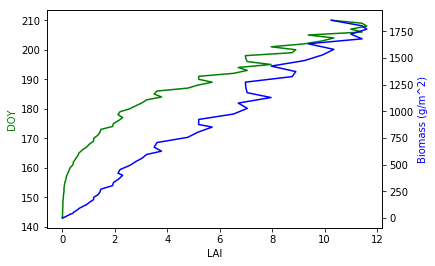

In [63]:
import numpy as np
import matplotlib.pyplot as plt
x = df1["GLAI-F"]
y1 = df1["DOY"]
y2 = df1["tdmp-F"]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('LAI')
ax1.set_ylabel('DOY', color='g')
ax2.set_ylabel('Biomass (g/m^2)', color='b')

plt.show()

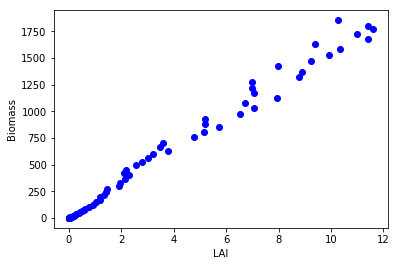

In [64]:

fig, ax1 = plt.subplots()
x = df1["GLAI-F"];
y = df1["tdmp-F"]
ax1.plot(x, y, 'bo')
ax1.set_xlabel('LAI')
ax1.set_ylabel ('Biomass')
plt.show()

I highly doubt this is correct, however, I would love to know how to do the calibration correctly. I played with the data but could not figure out the right way. 

# Within Season Calibration

Iteration: 1 ; EPOS (Positive Error) = 0.00 ; ENEG (Negative Error) =  0.00 ; Total Error =  0.00
Solution Converged


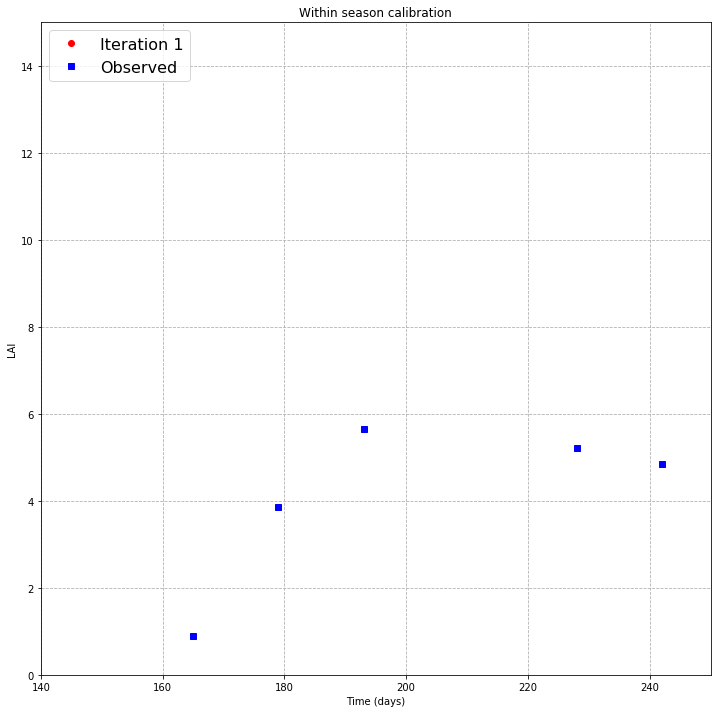

In [65]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))

OBS_Data = [(165, 0.88249), (179, 3.85782), (193, 5.66310), (228, 5.20722), (242, 4.85249), (270, 1.38895)]

CONST = 0.007    #user-supplied constant
LAI0 = 0.000406        #initial value of Weight (dry matter) (first guess)
Delt = 1     #simulation time step (1 "day")
ITERATION = 0    #initialize iteration count
CONVERGE = 0.005 #convergence criterion
MAXITER = 100    #maximum number of iterations

for itr in range(1,MAXITER,1): #iteration starts from 1; 0 is not necessary (w0=0.1)
    if itr > MAXITER:
        print("maximum iteration reached without convergence")
        break
    T = 0           #starting time
    LAIT = LAI0         #assign initial weight to weight for iteration 
    EPOS = 0.0      #positive errors
    ENEG = 0.0      #negative errors
    
    #Following loop calculates accumulated weight, for demo only
    LAIs =[]
    
    for i in range(len(df1["GLAI-F"]), Delt): 
        DeltLAI=CONST*LAIT*Delt
        LAIT=LAIT+DeltLAI
        LAIs.append((i,LAIT))
        T=T+Delt
        
        #Determine errors-
        ERRORS = 0
        for obs in OBS_Data:
            obs_day, val  = obs

            if T == obs_day:
                ERRORS = val - LAIT
                if ERRORS > 0.0:
                    EPOS = EPOS + ERRORS
                else: 
                    ENEG = ENEG - ERRORS
    
    if itr==1: style="ro"
    elif itr==2: style="yo"
    elif itr==3: style="go"
    
    plt.plot([LAIT[0] for LAIT in LAIs], [LAI[1] for LAI in LAIs], style, label="Iteration "+ str(itr))


    #Error Function Solution using secant method
    E = EPOS - ENEG
    print("Iteration:", itr, ";","EPOS (Positive Error) =", '{0:.2f}'.format(EPOS), ";", "ENEG (Negative Error) = ", '{0:.2f}'.format(ENEG), ";", "Total Error = ", '{0:.2f}'.format(E))
    
    if abs(E) < CONVERGE:
        print ("Solution Converged")
        break

    #Find root            
    if itr == 1: # Second guess
        OLDE = E
        OLDLAI0 = LAI0
        LAI0 = 2*LAI0  
    else:
        SLOPE = (LAI0 - OLDLAI0) / (E - OLDE)
        YINTC = LAI0 - E*SLOPE
        OLDE = E
        OLDLAI0 = LAI0
        LAI0 = YINTC
        #print("slope and Yintc are ", SLOPE, YINTC)
    #if solution is not found, go to another iteration    
    

# plot results

plt.title("Within season calibration")
plt.xlabel("Time (days)")
plt.ylabel("LAI")
plt.grid(linestyle="--")

axes = plt.gca()
axes.set_xlim([140, 250])
axes.set_ylim([0,15])
plt.plot([obs[0] for obs in OBS_Data], [obs[1] for obs in OBS_Data], "bs", label="Observed")
plt.legend(loc=2, prop={'size': 16})

plt.show()

In [66]:
#OBS_Data = [(165, 0.88249), (179, 3.85), (193, 5.66310), (228, 5.20722), (242, 4.85249)]

# Discussion

Modelling the plant growth and yield based on the weather data is highly cost effective method, however, it comes with its own limitation. The first and foremost limitation is that this type of modelling is highly empirical and even the calibration of simulated data with the field data might not be always feasible as weather pattern is highly variable and new algorithms has to be developed with time, based on the variation on weather. 

In this particular case, the Corn growth and developmet simulation in Bushland Texas was performed. Based on the weather data provided, very empirical methods like calculating the LAI based on Phyllochron information and Yield based on Harvest Index was done.While developing a prediction model, especially for something like Crop Growth and Yield, which has very huge number of variables contributing for different result, we must always consider that creating a perfect model is near to impossible therefore, working with the data obtained by least possible difficulty and coming up with results that most closely resemble the field data has to be the objective. Growing Degree Units are very important parameter that is used on Crop modelling and has been proved very effective in decision making for large scale commercial agricultural practices. 




# References 
1. Hanway, J. (1966). [online] Lib.dr.iastate.edu. Available at: https://lib.dr.iastate.edu/cgi/viewcontent.cgi?referer=https://www.google.com/&httpsredir=1&article=1045&context=specialreports [Accessed 12 May 2018].

2. Lindquist, John & J. Arkebauer, Timothy & T. Walters, Daniel & Cassman, Kenneth & Dobermann, Achim. (2005). Maize Radiation Use Efficiency under Optimal Growth Conditions. Agronomy Journal - AGRON J. 97. 10.2134/agronj2005.0072. 

3. Maas, S. J. 1993. Parameterized Model of Gramineous Crop Growth: I. Leaf Area and Dry Mass Simulation. Agron. J. 85:348-353. doi:10.2134/agronj1993.00021962008500020034x

4. Mygeohub.org. (2010). [online] Available at: https://mygeohub.org/resources/879/download/Corn-growth-stage-day-and-GDU-calendar10.pdf [Accessed 12 May 2018].

5. Nielsen, R. (2008). Late Planting/Replanting & Relative Hybrid Maturity - Corny News Network (Purdue University). [online] Agry.purdue.edu. Available at: https://www.agry.purdue.edu/ext/corn/news/articles.08/delayedplt_hybrids.html [Accessed 12 May 2018].

6. Soltani, Afshin & Robertson, M.J. & Mohammad-Nejad, Y & Rahemi-Karizaki, A. (2006). Modeling chickpea growth and development: Leaf production and senescence. Field Crops Research. 99. 14-23. 10.1016/j.fcr.2006.02.005. 

bigyan.rimal@ttu.edu